In [1]:
#### Importing the required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error

In [2]:
#### loading the dataset.
Data = pd.read_csv('Downloads/train.csv')
Data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [3]:
#### Checking the dataset is containing any null values.
Data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

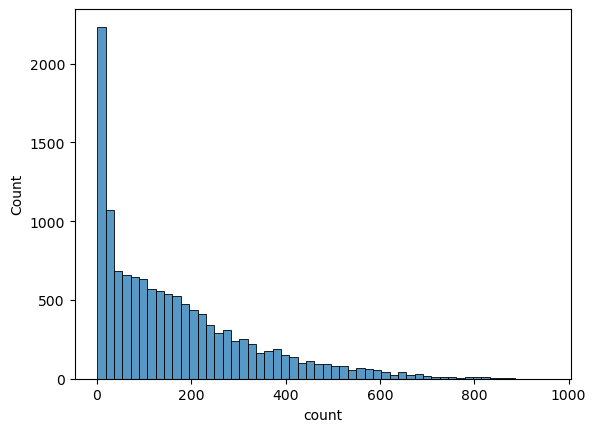

In [4]:
#### EDA: Exploratory Data Analysis using histplot wich gives the counts of the data values.
sns.histplot(Data['count'])
plt.show()

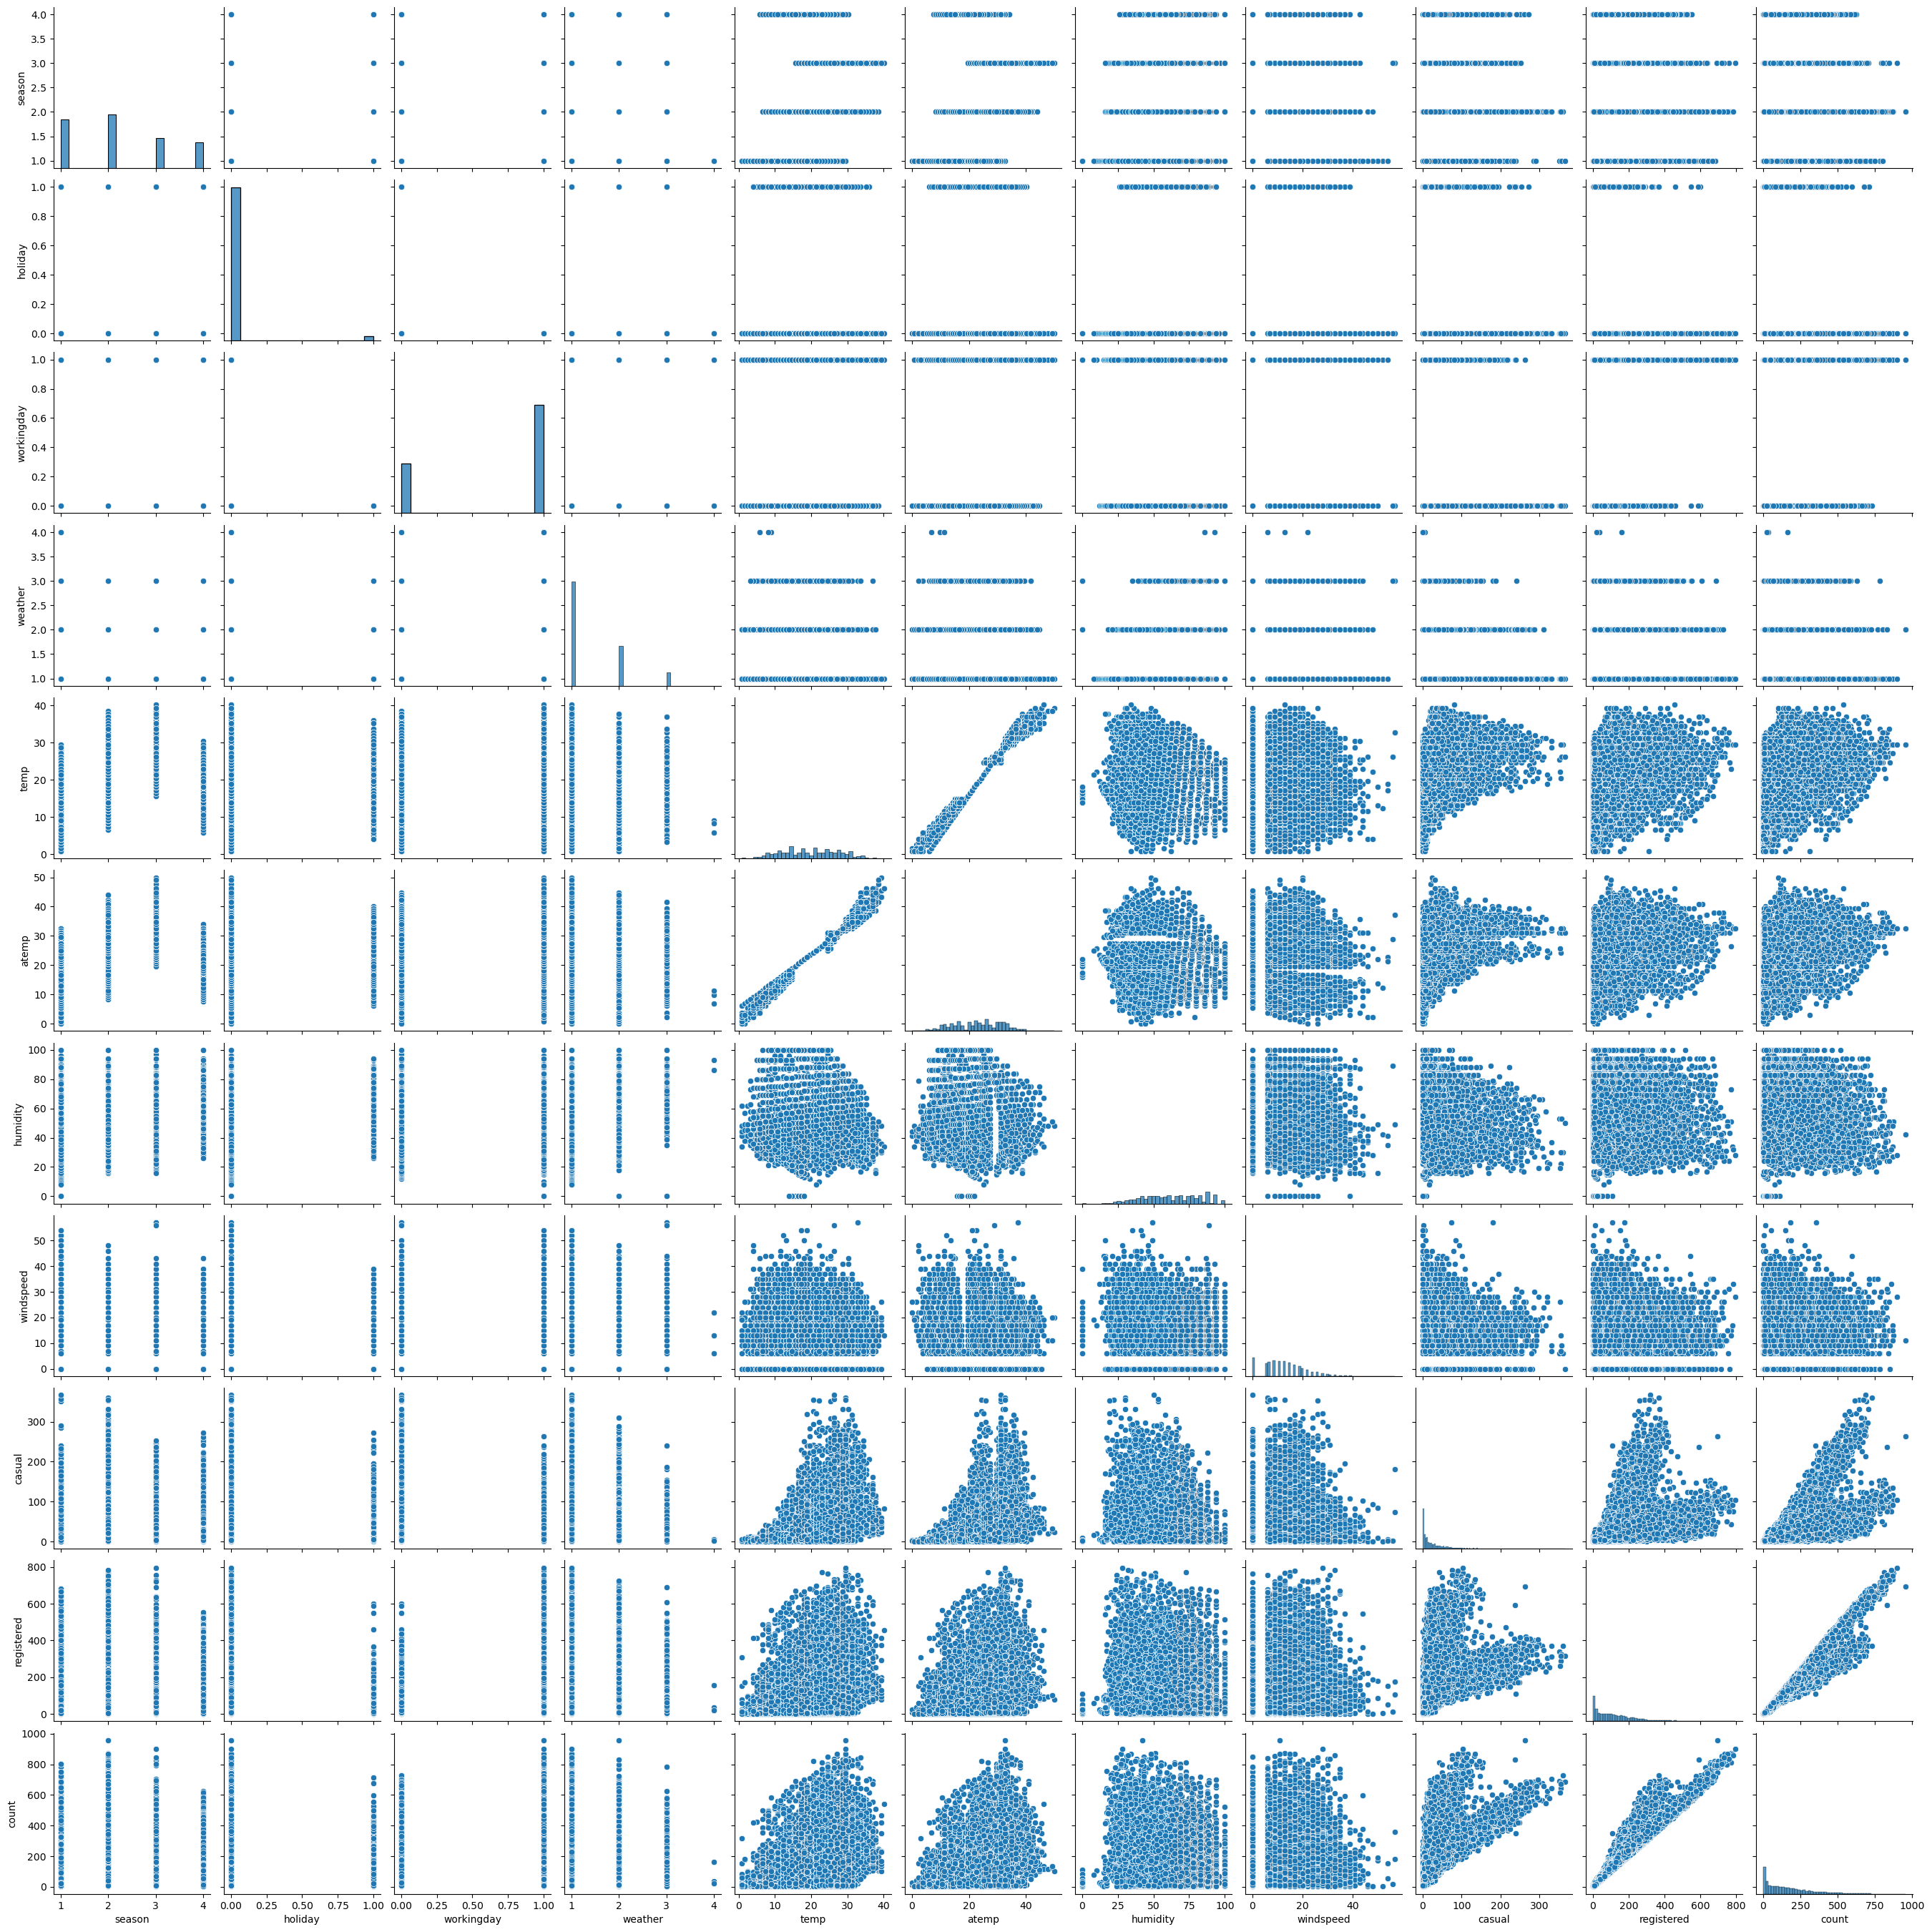

In [5]:
#### pair-plot wich gives the insight of data-set and each features comparison.
#### From the pair-plot will get to know wich features are similar or doing same impact on dependent variable/feature.
sns.pairplot(Data)
plt.show()

<AxesSubplot:>

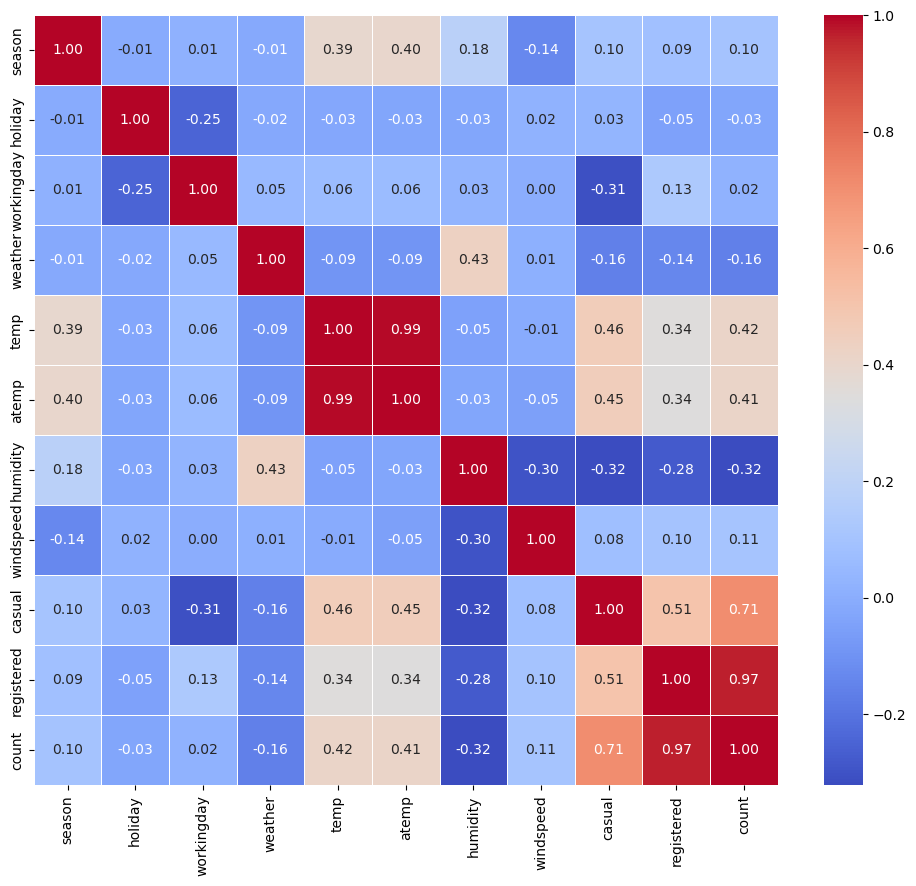

In [6]:
#### Heat-Map it will provide correlation beetween the features.
#### It will helps for the feature selection.
#### from the heat-map the temp and atemp both the features are impact same on dependent variable.
#### Now from the data set one of the feature('temp','atemp') we have to delete 
correlation_matrix = Data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)


In [7]:
#### This Step is  Data Preprocessing.
#### ML model wont take the sting or object data so here have to convert datetime column into datetime_format
#### datetime to [dayofweek,month,year,hour]
Data['datetime'] = pd.to_datetime(Data['datetime'])
Data['dayofweek'] = Data['datetime'].dt.dayofweek
Data['month'] = Data['datetime'].dt.month
Data['year'] = Data['datetime'].dt.year
Data['hour'] = Data['datetime'].dt.hour
Data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,month,year,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,5,1,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,5,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,5,1,2011,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,5,1,2011,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,5,1,2011,4


In [8]:
####using heatmap we can find the feature insights wich is a temp and atemp 
###both the features are highly correlated with each other ,wich means these two columns are doing the same same so either of these to one column shold be dropped  
####droping the datetime column after coverting in datetime format 
###droping the atemp column
Data = Data.drop(['datetime','atemp'], axis=1)

In [9]:
Data.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,dayofweek,month,year,hour
0,1,0,0,1,9.84,81.0,0.0,3,13,16,5,1,2011,0
1,1,0,0,1,9.02,80.0,0.0,8,32,40,5,1,2011,1
2,1,0,0,1,9.02,80.0,0.0,5,27,32,5,1,2011,2
3,1,0,0,1,9.84,75.0,0.0,3,10,13,5,1,2011,3
4,1,0,0,1,9.84,75.0,0.0,0,1,1,5,1,2011,4


In [18]:
#### splitting the data - saprating the independent and dependent variable in X and y.
#### Next Train_test_split.
#### Creating the model ,fitting the model and training the model using training data.
X = Data.drop('count', axis=1)
y = Data['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_1 = RandomForestRegressor()
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print(y_pred)

[552.74  78.74 259.39 ... 539.18  38.68  56.83]


In [19]:
X

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,dayofweek,month,year,hour
0,1,0,0,1,9.84,81.0,0.0000,3,13,5,1,2011,0
1,1,0,0,1,9.02,80.0,0.0000,8,32,5,1,2011,1
2,1,0,0,1,9.02,80.0,0.0000,5,27,5,1,2011,2
3,1,0,0,1,9.84,75.0,0.0000,3,10,5,1,2011,3
4,1,0,0,1,9.84,75.0,0.0000,0,1,5,1,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,3,0,1,1,37.72,42.0,16.9979,53,255,4,6,2012,20
12976,3,0,1,2,35.26,53.0,12.9980,41,195,4,6,2012,21
12977,3,0,1,3,33.62,63.0,12.9980,34,129,4,6,2012,22
12978,3,0,1,3,33.62,63.0,12.9980,6,42,4,6,2012,23


In [20]:
#### Defining function to reduce the code and returning the performance of the model
def RandomForestRegressor_model_1(X_train,X_test,y_train,y_test):
    model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
    model_1.fit(X_train, y_train)
    y_pred = model_1.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return mse,r2,rmsle

In [21]:
#### Evaluation of the Training model using the 'mean_square_error','r_2_score','Root_mean_square_log_error'
Accuracy = RandomForestRegressor_model_1(X_train,X_test,y_train,y_test)
print("mean square error,r2 score,root mean squred log error respectively",Accuracy)

mean square error,r2 score,root mean squred log error respectively (16.98464865177196, 0.9993382004144047, 0.011191887338041842)


In [23]:
#### Installing the joblib to save the Model
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [24]:
#### Importing joblib and saving the model by specifying the name of model 
import joblib
joblib.dump(model_1,'RANDOM_FOREST_MODEL.SAV')

['RANDOM_FOREST_MODEL.SAV']